In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data=pd.read_csv('rentals.csv',index_col='id')
data.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [97]:
data['price']=data['price'].str.extract('(\d+)',expand=False)

In [98]:
data.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170
3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,99
5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235
7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65
8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8111 entries, 958 to 39354181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8111 non-null   float64
 1   longitude       8111 non-null   float64
 2   property_type   8111 non-null   object 
 3   room_type       8111 non-null   object 
 4   bathrooms       8099 non-null   float64
 5   bedrooms        8107 non-null   float64
 6   minimum_nights  8111 non-null   int64  
 7   price           8111 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 570.3+ KB


In [100]:
data['price']=data['price'].astype(int)

In [101]:
data.isna().sum()

latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

In [102]:
data.dropna(inplace=True)
cols=['bedrooms','bathrooms']
for col in cols:
    data[col]=data[col].astype(int)

In [103]:
data.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
id,,,,,,,,
958,37.76931,-122.43386,Apartment,Entire home/apt,1,1,1,170
3850,37.75402,-122.45805,House,Private room,1,1,1,99
5858,37.74511,-122.42102,Apartment,Entire home/apt,1,2,30,235
7918,37.76669,-122.45250,Apartment,Private room,4,1,32,65
8142,37.76487,-122.45183,Apartment,Private room,4,1,32,65


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

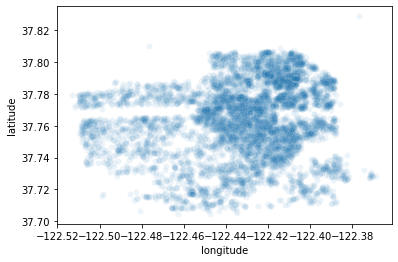

In [104]:
sns.scatterplot(x='longitude',y='latitude',data=data,alpha=0.08,)

<AxesSubplot:>

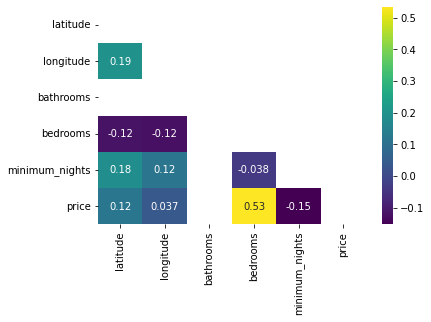

In [113]:
sns.heatmap(data.corr(),cmap='viridis',mask=np.triu(data.corr()),annot=True)

In [114]:
data['min_per_night']=data['price']/data['minimum_nights']

<AxesSubplot:>

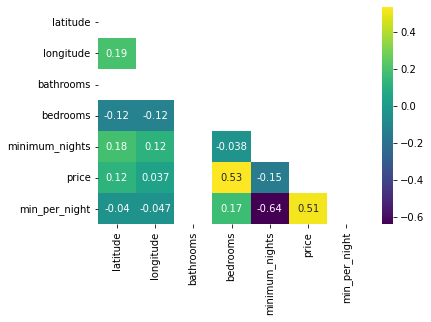

In [115]:
sns.heatmap(data.corr(),cmap='viridis',mask=np.triu(data.corr()),annot=True)

<Figure size 1440x1440 with 0 Axes>

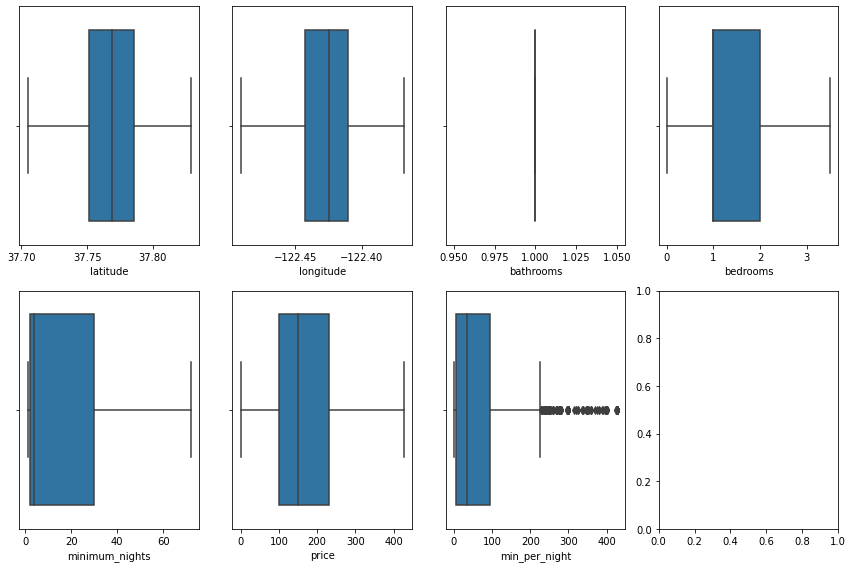

In [118]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,4,figsize=(12,8))
ax=ax.flatten()
for i,col in enumerate(data.select_dtypes(include=['int','float']).columns):
    sns.boxplot(data=data,x=col,ax=ax[i])
plt.tight_layout()

In [119]:
cat_feat=['property_type','room_type']

In [120]:
def remove_outliers(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    data[col]=data[col].apply(lambda x:Q1-1.5*IQR if x<(Q1-1.5*IQR) else (Q3+1.5*IQR if x>Q3+1.5*IQR else x))
    return data

In [121]:
for col in data.select_dtypes(include=['int','float']).columns:
    df=remove_outliers(data,col)

<Figure size 1440x1440 with 0 Axes>

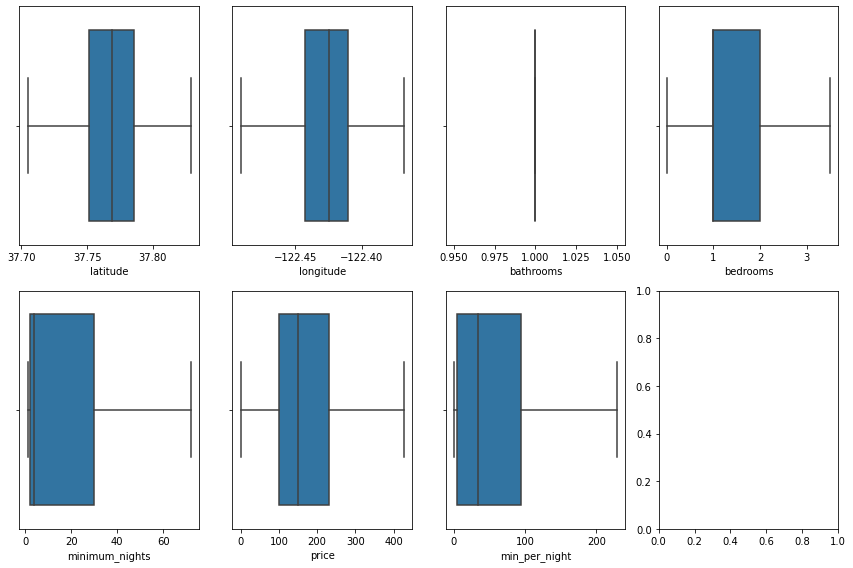

In [122]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,4,figsize=(12,8))
ax=ax.flatten()
for i,col in enumerate(data.select_dtypes(include=['int','float']).columns):
    sns.boxplot(data=data,x=col,ax=ax[i])
plt.tight_layout()

In [123]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [124]:
encoder=OrdinalEncoder()

In [125]:
data[cat_feat]=encoder.fit_transform(data[cat_feat])

In [126]:
data.head()

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price,min_per_night
id,,,,,,,,,
958,37.76931,-122.43386,1.0,0.0,1.0,1.0,1.0,170.0,170.000000
3850,37.75402,-122.45805,16.0,2.0,1.0,1.0,1.0,99.0,99.000000
5858,37.74511,-122.42102,1.0,0.0,1.0,2.0,30.0,235.0,7.833333
7918,37.76669,-122.45250,1.0,2.0,1.0,1.0,32.0,65.0,2.031250
8142,37.76487,-122.45183,1.0,2.0,1.0,1.0,32.0,65.0,2.031250


In [127]:
X=data.drop('price',axis=1)
y=data['price']

In [128]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
models={'Linreg':LinearRegression(),
       'Ridge':Ridge(),
       'Lasso':Lasso(),
       'rfr':RandomForestRegressor(),
       'gbr':GradientBoostingRegressor()}

In [131]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [132]:
result={}
for name,model in  models.items():
    score=cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
    result[name]=np.mean(score)

In [133]:
for model,score in result.items():
    print('___________')
    print(model,score)

___________
Linreg 0.625226581676214
___________
Ridge 0.6252269047019751
___________
Lasso 0.6247865185674435
___________
rfr 0.979948315029301
___________
gbr 0.9564808382689967


In [134]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)

In [135]:
from sklearn.metrics import mean_absolute_error

In [136]:
mean_absolute_error(y_test,pred)

3.213727871552079

In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,8095.0,37.766017,0.022937,37.70463,37.751430,37.76909,37.785600,37.82879
longitude,8095.0,-122.429663,0.025784,-122.49120,-122.442855,-122.42467,-122.410625,-122.36857
property_type,8095.0,8.450649,7.180920,0.00000,1.000000,8.00000,16.000000,25.00000
room_type,8095.0,0.825695,1.015512,0.00000,0.000000,0.00000,2.000000,3.00000
bathrooms,8095.0,1.000000,0.000000,1.00000,1.000000,1.00000,1.000000,1.00000
bedrooms,8095.0,1.322545,0.844489,0.00000,1.000000,1.00000,2.000000,3.50000
minimum_nights,8095.0,15.220136,15.264126,1.00000,2.000000,4.00000,30.000000,72.00000
price,8095.0,177.286473,107.724864,0.00000,99.000000,150.00000,230.000000,426.50000
min_per_night,8095.0,57.134087,64.641502,0.00000,4.933333,34.00000,94.500000,228.85000


In [138]:
pred_df=pd.DataFrame({'y_test':y_test,'prediction':pred})
pred_df['prediction']=pred_df['prediction'].astype('int')

In [139]:
pred_df.head()

,y_test,prediction
id,,
35276744,28.0,27
34931081,199.0,199
33912887,176.0,175
26160095,83.0,82
35125616,188.0,187


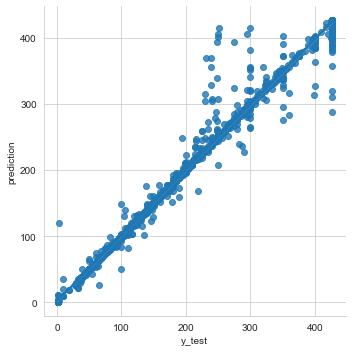

In [146]:
sns.set_style('whitegrid')
sns.lmplot(x='y_test',y='prediction',data=pred_df,)